# 챗봇 만들기

## 데이터 불러오기 및 EDA

In [1]:
import pandas as pd

DATA_IN_PATH = './data_in/'

data = pd.read_csv(DATA_IN_PATH + './data/ChatBotData.csv', encoding = 'utf-8')

In [2]:
data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


### 문장 전체에 대한 분석

In [3]:
sentences = list(data['Q'] + list(data['A']))
# sentences

In [9]:
tokenized_sentences = [s.split() for s in sentences]
sent_len_by_token = [len(t) for t in tokenized_sentences]
sent_len_by_eumjeol = [len(s.replace(" ","")) for s in sentences] #띄어쓰기 제외하고 음절의 길이 측정

from konlpy.tag import Twitter
from konlpy.tag import Okt

okt = Okt()

morph_tokenized_sentences = [okt.morphs(s.replace(' ','')) for s in sentences] #문장을 형태소 단위로 나눈다.
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]

Text(0, 0.5, 'Number of Sentences')

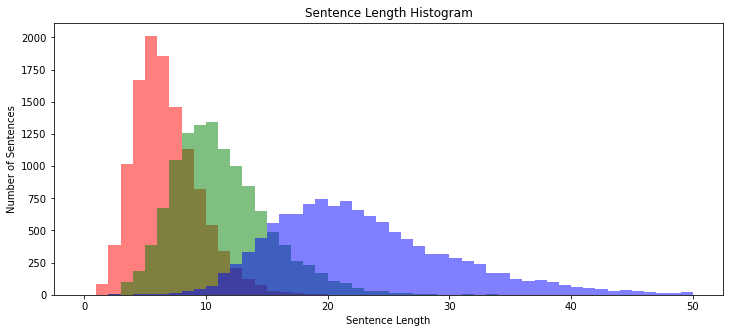

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize =(12,5))
plt.hist(sent_len_by_token, bins = 50, range = [0,50], alpha = 0.5, color = 'r', label = 'eojeol')
plt.hist(sent_len_by_morph, bins = 50, range = [0,50], alpha = 0.5, color = 'g', label = 'eojeol')
plt.hist(sent_len_by_eumjeol, bins = 50, range = [0,50], alpha = 0.5, color = 'b', label = 'eojeol')
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')


Text(0, 0.5, 'Number of Sentences')

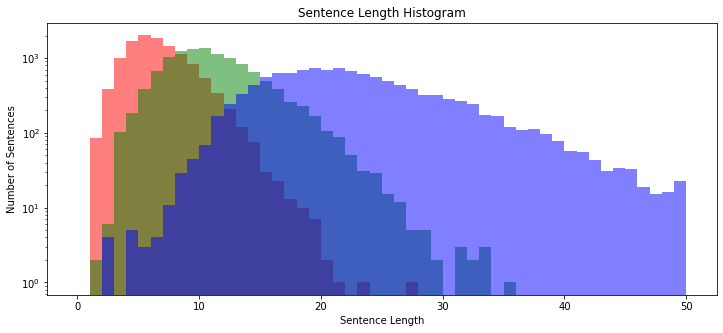

In [6]:
#y값이 각각 세 개 모두 다른데, y에 대해서 cale을 줌으로써 비슷하게 비교가 가능하게 만들었다.

plt.figure(figsize =(12,5))
plt.hist(sent_len_by_token, bins = 50, range = [0,50], alpha = 0.5, color = 'r', label = 'eojeol')
plt.hist(sent_len_by_morph, bins = 50, range = [0,50], alpha = 0.5, color = 'g', label = 'eojeol')
plt.hist(sent_len_by_eumjeol, bins = 50, range = [0,50], alpha = 0.5, color = 'b', label = 'eojeol')
plt.yscale('log')
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')


In [7]:
import numpy as np

print('어절 최대 길이 : {}'.format(np.max(sent_len_by_token)))
print('어절 최소 길이 : {}'.format(np.min(sent_len_by_token)))
print('어절 평균 길이 : {:.2f}'.format(np.mean(sent_len_by_token)))
print('어절 길이 표준편차 : {:.2f}'.format(np.std(sent_len_by_token)))
print('어절 중간 길이 : {}'.format(np.median(sent_len_by_token)))
print('제 1사분위 길이 : {}'.format(np.percentile(sent_len_by_token,25)))
print('제 3사분위 길이 : {}'.format(np.percentile(sent_len_by_token, 75)))


어절 최대 길이 : 27
어절 최소 길이 : 1
어절 평균 길이 : 6.28
어절 길이 표준편차 : 2.67
어절 중간 길이 : 6.0
제 1사분위 길이 : 4.0
제 3사분위 길이 : 8.0


{'whiskers': [<matplotlib.lines.Line2D at 0x191e0142160>,
 'caps': [<matplotlib.lines.Line2D at 0x191e01427c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x191dfd226a0>,
 'medians': [<matplotlib.lines.Line2D at 0x191e0132820>,
 'fliers': [<matplotlib.lines.Line2D at 0x191dfff6820>,
 'means': [<matplotlib.lines.Line2D at 0x191e0132a90>,
  <matplotlib.lines.Line2D at 0x191dd09ba90>]}

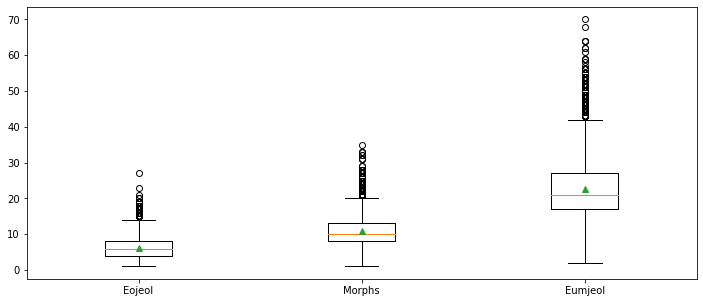

In [10]:
plt.figure(figsize = (12,5))
plt.boxplot([sent_len_by_token, sent_len_by_morph, sent_len_by_eumjeol],
           labels = ['Eojeol','Morphs','Eumjeol'],
           showmeans = True)



### 질문, 답변 각각에 대한 문장 길이 분포 분석

In [11]:
data

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
...,...,...,...
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2


In [14]:
query_sentences =  list(data['Q'])
answer_sentences = list(data['A'])

query_morph_tokenized_sentences = [okt.morphs(s.replace(' ','')) for s in query_sentences]
query_sent_len_by_morph = [len(t) for t in query_morph_tokenized_sentences]

answer_morph_tokenized_sentences = [okt.morphs(s.replace(" ","")) for s in answer_sentences]
answer_sent_len_by_morph = [len(t) for t in answer_morph_tokenized_sentences]


Text(0, 0.5, 'Number of Queries')

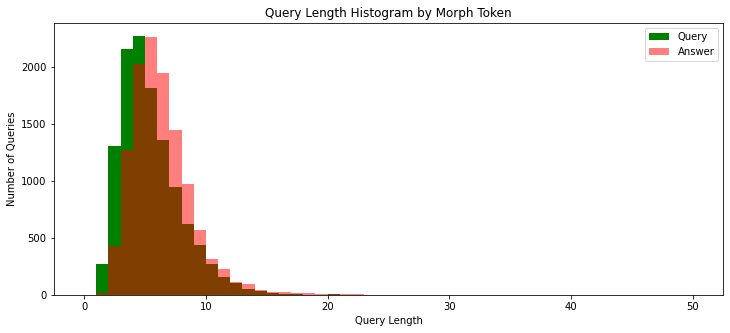

In [15]:
plt.figure(figsize = (12,5))
plt.hist(query_sent_len_by_morph, bins = 50, range = [0,50], color = 'g', label = 'Query')
plt.hist(answer_sent_len_by_morph, bins = 50, range = [0,50], color = 'r', alpha = 0.5,
        label = 'Answer')
plt.legend()
plt.title('Query Length Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')


<ipython-input-16-4ae3cee3ed94>:7: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy = 'clip')


Text(0, 0.5, 'Number of Queries')

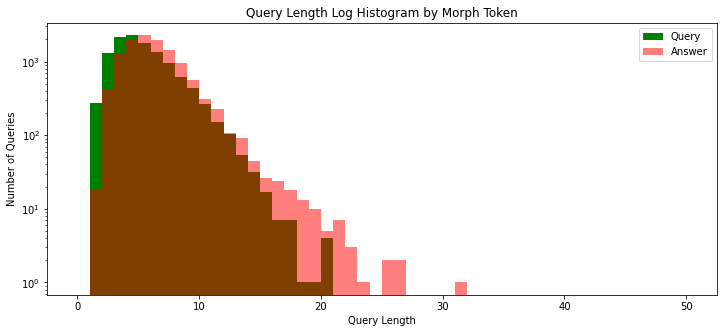

In [16]:
plt.figure(figsize = (12,5 ))
plt.hist(query_sent_len_by_morph, bins = 50, range = [0,50], color = 'g', label = 'Query')
plt.hist(answer_sent_len_by_morph, bins = 50, range = [0,50], color = 'r', alpha = 0.5,
        label = 'Answer')

plt.legend()
plt.yscale('log', nonposy = 'clip')
plt.title('Query Length Log Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')


{'whiskers': [<matplotlib.lines.Line2D at 0x191e11e33d0>,
 'caps': [<matplotlib.lines.Line2D at 0x191e11e3a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x191e11e3070>,
 'medians': [<matplotlib.lines.Line2D at 0x191e11ea1c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x191e11ea520>,
 'means': []}

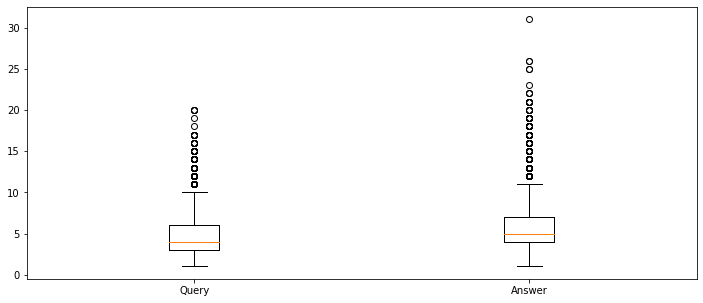

In [17]:
plt.figure(figsize = (12,5))
plt.boxplot([query_sent_len_by_morph, answer_sent_len_by_morph],
           labels = ['Query', 'Answer'])


입력값으로 사용할 문장 길이를 사용해야 하는데, 최적화 하는 규칙이 따로 있는 것도 아니다.  
통계 기반으로 해서 3사분위를 사용할 수 있는데, 3사분위 값이 만족할만한 성능을 내지 않을 수도 있다.  
따라서 경험적으로 여러번 실험을 해보고 최적의 학습 문장 길이가 25임을 밝혀냄.  
이 수치는 3사분위값 주변을 탐색하면서 얻음.  

### 데이터 어휘 빈도 분석

자주 사용하는 단어를 분석하면 분명 '이', '가' 와 같은 것들이 많은 빈도수를 차지할 것.  
이는 모든 문서에서 당연한 결과이므로 이를 배제하고 진행해야 한다.  
의미상 중요한 명사, 형용사, 동사만 따로 모은 후에 빈도수 분석을 진행해야만 한다.  

#### 품사별 단어 구분

Okt 형태소 분석기의 품사 분류 기능을 사용하면 된다.  
품사를 분류해서 "명사", "형용사", "동사" 만 사용.  

In [23]:
from konlpy.tag import Okt

okt = Okt()
okt.pos('오늘밤은유난히덥구나') #POS-tagging : 품사 분류, 줄여서 pos

[('오늘밤', 'Noun'), ('은', 'Josa'), ('유난히', 'Adverb'), ('덥구나', 'Adjective')]

In [24]:
query_NVA_token_sentences = list()
answer_NVA_token_sentences = list()


for s in query_sentences:
    for token, tag in okt.pos(s.replace(' ','')): #[('오늘밤', 'Noun'), ('은', 'Josa'), ('유난히', 'Adverb'), ('덥구나', 'Adjective')]
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            query_NVA_token_sentences.append(token)
            
            
for s in answer_sentences:
    temp_token_bucket = list()
    for token, tag in okt.pos(s.replace(' ','')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            answer_NVA_token_sentences.append(token)
            
query_NVA_token_sentences = ' '.join(query_NVA_token_sentences)
answer_NVA_token_sentences = ' '.join(answer_NVA_token_sentences)

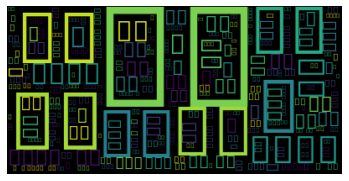

In [28]:
from wordcloud import WordCloud


#폰트 설정을 모르겠네..
query_wordcloud = WordCloud().generate(query_NVA_token_sentences)

plt.imshow(query_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

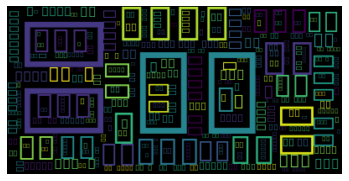

In [31]:
answer_wordcloud = WordCloud().generate(answer_NVA_token_sentences)
plt.imshow(answer_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## 시퀀스 투 시퀀스 모델

객체지향적으로 코드를 만들어서 전처리 과정을 모듈화 할 것.  
seq2seq 사용 분야 : 기계 번역(비중 가장 큼), 텍스트 요약, 이미지 설명, 대화 모델